# **Lab 4 Image Blur**

Environment Setup:  Prepare the envirionment by installing the CUDA 11.7 and pointing to the correct location of the install.

In [ ]:
!nvidia-smi
!nvcc --version
!apt-get -y install cuda-11-7
!update-alternatives --set cuda /usr/local/cuda-11.7


Sun Feb 16 00:41:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Check the version to ensure it is CUDA 11.7

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Jun__8_16:49:14_PDT_2022
Cuda compilation tools, release 11.7, V11.7.99
Build cuda_11.7.r11.7/compiler.31442593_0


Mount Google drive.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

You must change directory to the path where the code for this lab is uploaded.

In [ ]:
%cd drive/MyDrive/SP25-HPC/Mod4-Lab-ImageBlur/Image_blur_sol/

[Errno 2] No such file or directory: 'drive/MyDrive/SP25-HPC/Mod4-Lab-ImageBlur/Image_blur_sol/'
/content


1. Prepare a Grayscale Input Image
In this cell we download a sample image (the classic “Lenna”), convert it to grayscale, and save it as input.png.

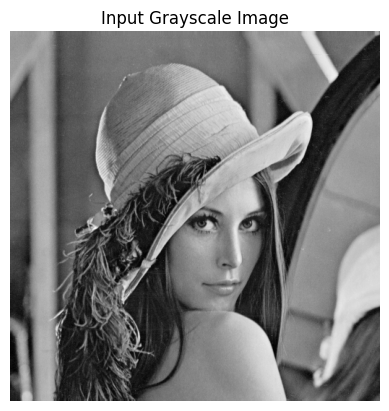

In [3]:
import cv2
import urllib.request
import numpy as np
from matplotlib import pyplot as plt

# Download a sample image (Lenna)
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
resp = urllib.request.urlopen(url)
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image_data, cv2.IMREAD_COLOR)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("input.png", gray)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.title("Input Grayscale Image")
plt.axis('off')
plt.show()


2. Download Required Image Library Headers
Our CUDA C program will use the single‑file libraries stb_image.h and stb_image_write.h. We download them in this cell:

In [4]:
!wget -q https://raw.githubusercontent.com/nothings/stb/master/stb_image.h
!wget -q https://raw.githubusercontent.com/nothings/stb/master/stb_image_write.h


3. Write the CUDA C Code
This cell writes a CUDA C program (blur.cu) that:

Loads the input image (forcing 1 channel for grayscale) using stb_image.
Allocates device memory.
Launches a CUDA kernel that performs a simple 3×3 blur.
Copies the result back and writes the blurred image using stb_image_write. %%writefile blur.cu


Upload the file.

In [27]:
from google.colab import files
uploaded = files.upload()

Saving blur.cu to blur.cu


4. Compile the CUDA Program
Compile the program using nvcc (the NVIDIA CUDA compiler):

In [28]:
!rm -rf *.o
!nvcc blur.cu -o blur

stb_image.h(4276): warning #550-D: variable "old_limit" was set but never used

stb_image.h(5185): warning #550-D: variable "idata_limit_old" was set but never used

stb_image.h(6972): warning #550-D: variable "out_size" was set but never used

stb_image.h(6973): warning #550-D: variable "delays_size" was set but never used

blur.cu(122): warning #549-D: variable "cuda_ret" is used before its value is set

blur.cu(122): warning #549-D: variable "cuda_ret" is used before its value is set



5. Run the CUDA Program
Run the executable to process the image:
You should see an output message indicating that the blurred image was saved as output.png.

In [29]:
!./blur

Grid: 32, 32, 1
Block: 16, 16, 1
Start exporting -->> 
No CUDA errors detected.
Image written successfully
Output image savedImage blur completed. Output saved as output.png


6. Display the Blurred Output Image
Finally, use Python to load and display the blurred image:

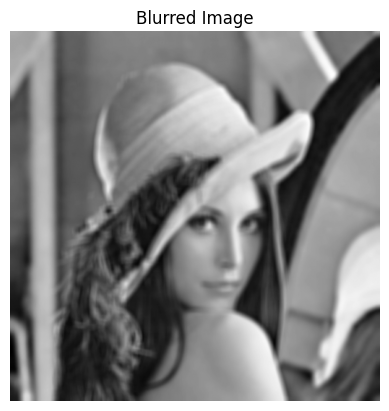

In [30]:
import cv2
from matplotlib import pyplot as plt

# Load the blurred image
blurred = cv2.imread("output.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')
plt.show()